# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import random
import torch
import numpy as np
import datetime
from collections import deque
#plot
import matplotlib.pyplot as plt
%matplotlib inline
#Time
import datetime
import time

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
env = UnityEnvironment(file_name='.\Reacher_Windows_x86_64 (1)\Reacher_Windows_x86_64\Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    #actions = TrainedActor(states).detach().numpy()
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    #print ('Rewards',rewards),.l
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    #print('Scores' ,scores)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.12999999709427357


In [6]:
#DeepDeterminsticPolicyGradient DDPG
from nn_model import Actor , Critic
from agent import DDPGAgent

In [7]:
#Test to create the instance of AiAgent
#state_size = np.array(state_size)
reacherAI = DDPGAgent(state_size,action_size,random_seed=1)
print(reacherAI.actor_local)
print(reacherAI.critic_local)

Actor(
  (fc1): Linear(in_features=33, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=48, bias=True)
  (fc3): Linear(in_features=48, out_features=4, bias=True)
)
Critic(
  (fcs1): Linear(in_features=33, out_features=24, bias=True)
  (fc2): Linear(in_features=28, out_features=48, bias=True)
  (fc3): Linear(in_features=48, out_features=1, bias=True)
)


In [13]:
# Deep Determinsitic Policy Gradient Algorithm
# Policy Based -Actor Critic Method
# Changes:
    #Reward plot for Avg Agent's score for each episode
    #Added learning at every state change

def Ddpg(n_episodes=1000, max_t=300, print_every=100):
    
    scores_ddpg = []                           #Final Scores to Plot
    rewards_plot = []
    episode_reward=np.zeros(num_agents) 
    scores = np.zeros(num_agents)              #Reward for the Episodes reset
    scores_window = deque(maxlen=print_every)  #Window for every 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
        
        #set initial state
        state = env_info.vector_observations  #[0] Current state 
        #Reset
        reacherAI.reset()
        rewards = 0
        counter_i=0
        episode_reward=np.zeros(num_agents) 
        #For each Episode,  take max steps and record the state and reward information until Episode complete       
        while True: # t in range(max_t):
            #Select action based on  policy based
            action = reacherAI.act(state)
            action = np.clip(action, -1, 1)          #all actions between -1 and 1
            
            env_info = env.step(action)[brain_name]   #Perform 'action'
            next_state = env_info.vector_observations #Next env state info 
            rewards = env_info.rewards                 #reward +0.1 for every timestep
            done   = env_info.local_done              #Episode complete
            
            scores += rewards                          #Accumulate Rewards
            state = next_state                        #mark new state as current state
            episode_reward+=rewards
            
            if np.any(done):
                reacherAI.step (state, action,rewards,next_state,done) 
                #rewards_plot.append(episode_reward)              #Rewards from each episode's steps
                rewards_plot.append(np.mean(scores))              #Avg Score for each episode
                scores_window.append(episode_reward)             #Print the windows score
                break             
            
        #Uncomment when you want to check the scores for  each episode 
        #print('Total score (averaged over agents) this episode {}\t: {}'.format(i_episode,np.mean(scores)))  
        
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage  Score: {:.4f}\t AcScore {:.4f}'.format(i_episode, np.mean(scores_window),np.mean(scores)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic.pth')
        if np.mean(scores)>=30.0 and i_episode>900: 
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor30.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic30.pth')
            break
              
                   
    return rewards_plot
#Latest24

2020-07-24 20:03:30.826207


C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 50	Average  Score: 0.6976	 AcScore 34.8800
Episode 100	Average  Score: 0.7953	 AcScore 79.5300
Episode 150	Average  Score: 0.8407	 AcScore 118.9500
Episode 200	Average  Score: 0.7239	 AcScore 151.9200
Episode 250	Average  Score: 0.7645	 AcScore 195.4000
Episode 300	Average  Score: 0.8389	 AcScore 235.8100
Episode 350	Average  Score: 0.8346	 AcScore 278.8600
Episode 400	Average  Score: 0.8271	 AcScore 318.5200
Episode 450	Average  Score: 0.8158	 AcScore 360.4400
Episode 500	Average  Score: 0.8793	 AcScore 406.4500
Episode 550	Average  Score: 0.9725	 AcScore 457.6900
Episode 600	Average  Score: 0.9749	 AcScore 503.9400
Episode 650	Average  Score: 0.9208	 AcScore 549.7700
Episode 700	Average  Score: 0.8882	 AcScore 592.7600
Episode 750	Average  Score: 0.8633	 AcScore 636.1000
Episode 800	Average  Score: 0.8108	 AcScore 673.8400
Episode 850	Average  Score: 0.7214	 AcScore 708.2400
Episode 900	Average  Score: 0.6578	 AcScore 739.6200

Environment solved in 901 episodes!	Average Scor

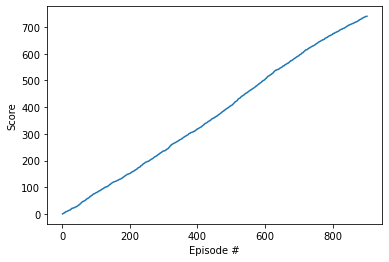

In [14]:
# Iteration Ver 17.1 Over 900 Episodes  - just to see the learning curve
#BUFFER_SIZE = 500000    #int(1e4)  # replay buffer size
#BATCH_SIZE = 256       #128        # minibatch size
#GAMMA = 0.997            # discount factor
#TAU = 0.0013              # for soft update of target parameters
#LR_ACTOR = 0.00013         # learning rate of the actor 
#LR_CRITIC = 0.0001        # learning rate of the critic
#WEIGHT_DECAY = 0        # L2 weight decay

#Noise mu=0., theta=0.17, sigma=0.24
#Random seed = 1
start = datetime.datetime.now()
print (start)
scores = Ddpg(n_episodes=1000)
endtime = datetime.datetime.now() -start
print (endtime)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Reward Plot

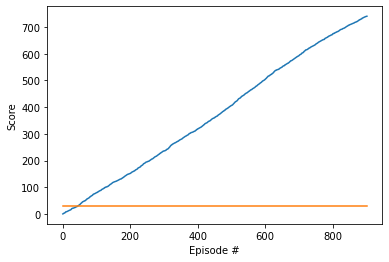

In [15]:
#Plot with average line >30
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(len(scores)), 30*np.ones(len(scores)))# print avg score 30
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

2020-07-24 19:53:44.791327


C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average  Score: 0.6680	 AcScore 66.8000

Environment solved in 101 episodes!	Average Score: 67.1200
0:06:24.060748


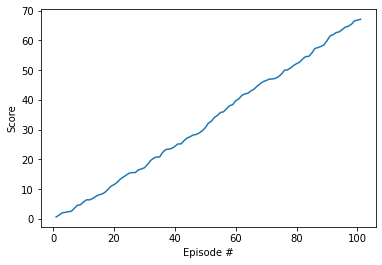

In [10]:
# Iteration Ver 17.1 Over 100 Episodes  - Corrected Noise and (samples) from the â€œstandard normalâ€ distribution.
#BUFFER_SIZE = 500000    #int(1e4)  # replay buffer size
#BATCH_SIZE = 256       #128        # minibatch size
#GAMMA = 0.997            # discount factor
#TAU = 0.0013              # for soft update of target parameters
#LR_ACTOR = 0.00013         # learning rate of the actor 
#LR_CRITIC = 0.0001        # learning rate of the critic
#WEIGHT_DECAY = 0        # L2 weight decay

#Noise mu=0., theta=0.17, sigma=0.24
#Random seed = 1
start = datetime.datetime.now()
print (start)
scores = Ddpg(n_episodes=1000)
endtime = datetime.datetime.now() -start
print (endtime)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

2020-07-24 14:01:15.057867


C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Total score (averaged over agents) this episode 1	: 0.42999999038875103
Total score (averaged over agents) this episode 2	: 0.9599999785423279
Total score (averaged over agents) this episode 3	: 2.079999953508377
Total score (averaged over agents) this episode 4	: 2.869999935850501
Total score (averaged over agents) this episode 5	: 3.4399999231100082
Total score (averaged over agents) this episode 6	: 5.14999988488853
Total score (averaged over agents) this episode 7	: 5.329999880865216
Total score (averaged over agents) this episode 8	: 5.9699998665601015
Total score (averaged over agents) this episode 9	: 7.799999825656414
Total score (averaged over agents) this episode 10	: 8.799999803304672
Episode 10	Average  Score: 0.8800	 AcScore 8.8000
Total score (averaged over agents) this episode 11	: 9.619999784976244
Total score (averaged over agents) this episode 12	: 11.34999974630773
Total score (averaged over agents) this episode 13	: 11.609999740496278
Total score (averaged over agen

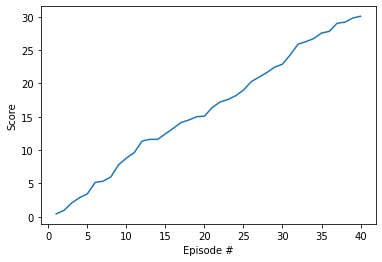

In [10]:
# Iteration Ver 17  - Corrected Noise and (samples) from the â€œstandard normalâ€ distribution.
#BUFFER_SIZE = 500000    #int(1e4)  # replay buffer size
#BATCH_SIZE = 256       #128        # minibatch size
#GAMMA = 0.997            # discount factor
#TAU = 0.0013              # for soft update of target parameters
#LR_ACTOR = 0.00013         # learning rate of the actor 
#LR_CRITIC = 0.0001        # learning rate of the critic
#WEIGHT_DECAY = 0        # L2 weight decay

#Noise mu=0., theta=0.17, sigma=0.24
#Random seed = 1
start = datetime.datetime.now()
print (start)
scores = Ddpg(n_episodes=500)
endtime = datetime.datetime.now() -start
print (endtime)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

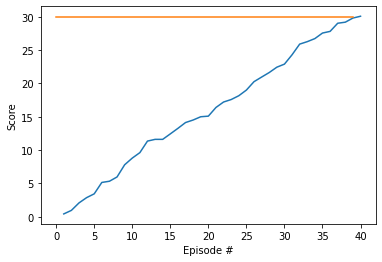

In [11]:
#Plot with average line >30
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(len(scores)), 30*np.ones(len(scores)))# print avg score 30
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [12]:
#backup for Reward plots 
scores_Epi40 = scores

# Watch the Trained Agent - Loading the weights and Test


In [46]:
reacherAI.actor_local.load_state_dict(torch.load('checkpoint_actor30.pth'))
reacherAI.critic_local.load_state_dict(torch.load('checkpoint_critic30.pth'))

env_info = env.reset(train_mode=False)[brain_name]
scores = np.zeros(num_agents)       
#set initial state
state = env_info.vector_observations

while True:
    action = reacherAI.act(state, add_noise=True)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations
    reward = env_info.rewards
    done   = env_info.local_done
    scores += reward                       
    state = next_state
           
    if np.any(done):
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))  

Total score (averaged over agents) this episode: 0.9399999789893627


In [22]:
reacherAI.actor_local.load_state_dict(torch.load('checkpoint_actor30.pth'))
reacherAI.critic_local.load_state_dict(torch.load('checkpoint_critic30.pth'))

env_info = env.reset(train_mode=False)[brain_name]
scores = np.zeros(num_agents)       
#set initial state
state = env_info.vector_observations

while True:
    action = reacherAI.act(state, add_noise=True)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations
    reward = env_info.rewards
    done   = env_info.local_done
    scores += reward                       
    state = next_state
           
    if np.any(done):
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))  

Total score (averaged over agents) this episode: 1.0699999760836363


In [14]:
#Environment Close
env.close()

# Target score 90. Environment solved in 901 episodes!	Average Score: 529.7200

In [24]:
#Long Training aiming avg score 99
# Deep Determinsitic Policy Gradient Algorithm
# Policy Based -Actor Critic Method
# Changes:
    #Reward plot for Avg Agent's score for each episode
    #Added learning at every state change

def Ddpg(n_episodes=1000, max_t=300, print_every=100):
    
    scores_ddpg = []                           #Final Scores to Plot
    rewards_plot = []
    episode_reward=np.zeros(num_agents) 
    scores = np.zeros(num_agents)              #Reward for the Episodes reset
    scores_window = deque(maxlen=print_every)  #Window for every 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
        
        #set initial state
        state = env_info.vector_observations  #[0] Current state 
        #Reset
        reacherAI.reset()
        rewards = 0
        counter_i=0
        episode_reward=np.zeros(num_agents) 
        #For each Episode,  take max steps and record the state and reward information until Episode complete       
        while True: # t in range(max_t):
            #Select action based on  policy based
            action = reacherAI.act(state)
            action = np.clip(action, -1, 1)          #all actions between -1 and 1
            
            env_info = env.step(action)[brain_name]   #Perform 'action'
            next_state = env_info.vector_observations #Next env state info 
            rewards = env_info.rewards                 #reward +0.1 for every timestep
            done   = env_info.local_done              #Episode complete
            
            scores += rewards                          #Accumulate Rewards
            state = next_state                        #mark new state as current state
            episode_reward+=rewards
            
            if np.any(done):
                reacherAI.step (state, action,rewards,next_state,done) 
                #rewards_plot.append(episode_reward)              #Rewards from each episode's steps
                rewards_plot.append(np.mean(scores))              #Avg Score for each episode
                scores_window.append(episode_reward)             #Print the windows score
                break             
            
        #Uncomment when you want to check the scores for  each episode 
        #print('Total score (averaged over agents) this episode {}\t: {}'.format(i_episode,np.mean(scores)))  
        
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage  Score: {:.4f}\t AcScore {:.4f}'.format(i_episode, np.mean(scores_window),np.mean(scores)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic.pth')
        if np.mean(scores)>=90.0 and i_episode>900: 
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor30.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic30.pth')
            break
              
                   
    return rewards_plot
#Latest24

2020-07-24 21:25:22.376903
Episode 50	Average  Score: 0.7222	 AcScore 36.1100
Episode 100	Average  Score: 0.7257	 AcScore 72.5700
Episode 150	Average  Score: 0.6937	 AcScore 105.4800
Episode 200	Average  Score: 0.5960	 AcScore 132.1700
Episode 250	Average  Score: 0.5472	 AcScore 160.2000
Episode 300	Average  Score: 0.5737	 AcScore 189.5400
Episode 350	Average  Score: 0.5664	 AcScore 216.8400
Episode 400	Average  Score: 0.5827	 AcScore 247.8100
Episode 450	Average  Score: 0.5976	 AcScore 276.6000
Episode 500	Average  Score: 0.5842	 AcScore 306.2300
Episode 550	Average  Score: 0.5804	 AcScore 334.6400
Episode 600	Average  Score: 0.6033	 AcScore 366.5600
Episode 650	Average  Score: 0.6068	 AcScore 395.3200
Episode 700	Average  Score: 0.5607	 AcScore 422.6300
Episode 750	Average  Score: 0.5323	 AcScore 448.5500
Episode 800	Average  Score: 0.5514	 AcScore 477.7700
Episode 850	Average  Score: 0.5324	 AcScore 501.7900
Episode 900	Average  Score: 0.5109	 AcScore 528.8600

Environment solved in

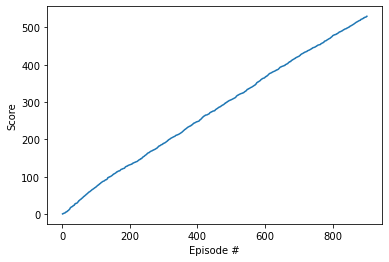

In [25]:
# Iteration Ver 24  - aims to get Avg score >90
#BUFFER_SIZE = 500000    #int(1e4)  # replay buffer size
#BATCH_SIZE = 256       #128        # minibatch size
#GAMMA = 0.997            # discount factor
#TAU = 0.0013              # for soft update of target parameters
#LR_ACTOR = 0.00013         # learning rate of the actor 
#LR_CRITIC = 0.0001        # learning rate of the critic
#WEIGHT_DECAY = 0        # L2 weight decay

#Noise mu=0., theta=0.17, sigma=0.24
#Random seed = 1
start = datetime.datetime.now()
print (start)
scores = Ddpg(n_episodes=50000)
endtime = datetime.datetime.now() -start
print (endtime)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

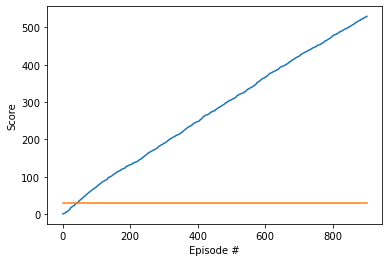

In [27]:
#Plot with average line >90
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(len(scores)), 30*np.ones(len(scores)))# print avg score 30
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [37]:
#Long Training aiming avg score 99
# Deep Determinsitic Policy Gradient Algorithm
# Policy Based -Actor Critic Method
# Changes:
    #Reward plot for Avg Agent's score for each episode
    #Added learning at every state change

def Ddpg(n_episodes=1000, max_t=300, print_every=100):
    
    scores_ddpg = []                           #Final Scores to Plot
    rewards_plot = []
    episode_reward=np.zeros(num_agents) 
    scores = np.zeros(num_agents)              #Reward for the Episodes reset
    scores_window = deque(maxlen=print_every)  #Window for every 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
        
        #set initial state
        state = env_info.vector_observations  #[0] Current state 
        #Reset
        reacherAI.reset()
        rewards = 0
        counter_i=0
        episode_reward=np.zeros(num_agents) 
        #For each Episode,  take max steps and record the state and reward information until Episode complete       
        while True: # t in range(max_t):
            #Select action based on  policy based
            action = reacherAI.act(state)
            action = np.clip(action, -1, 1)          #all actions between -1 and 1
            
            env_info = env.step(action)[brain_name]   #Perform 'action'
            next_state = env_info.vector_observations #Next env state info 
            rewards = env_info.rewards                 #reward +0.1 for every timestep
            done   = env_info.local_done              #Episode complete
            
            scores += rewards                          #Accumulate Rewards
            state = next_state                        #mark new state as current state
            episode_reward+=rewards
            
            if np.any(done):
                reacherAI.step (state, action,rewards,next_state,done) 
                #rewards_plot.append(episode_reward)              #Rewards from each episode's steps
                rewards_plot.append(np.mean(scores))              #Avg Score for each episode
                scores_window.append(episode_reward)             #Print the windows score
                break             
            
        #Uncomment when you want to check the scores for  each episode 
        #print('Total score (averaged over agents) this episode {}\t: {}'.format(i_episode,np.mean(scores)))  
        
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage  Score: {:.4f}\t AcScore {:.4f}'.format(i_episode, np.mean(scores_window),np.mean(scores)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic.pth')
        if np.mean(scores_window)>30.0 and i_episode>100: 
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores)))
            torch.save(reacherAI.actor_local.state_dict(), 'checkpoint_actor30.pth')
            torch.save(reacherAI.critic_local.state_dict(), 'checkpoint_critic30.pth')
            break
              
                   
    return scores_window #rewards_plot
#Latest24

2020-07-24 23:26:35.998308


C:\Users\senth\.conda\envs\drlnd\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 50	Average  Score: 0.4474	 AcScore 22.3700
Episode 100	Average  Score: 0.5048	 AcScore 50.4800
Episode 150	Average  Score: 0.5517	 AcScore 77.5400
Episode 200	Average  Score: 0.5678	 AcScore 107.2600
Episode 250	Average  Score: 0.5484	 AcScore 132.3800
Episode 300	Average  Score: 0.5179	 AcScore 159.0500
Episode 350	Average  Score: 0.5130	 AcScore 183.6800
Episode 400	Average  Score: 0.5026	 AcScore 209.3100
Episode 450	Average  Score: 0.5334	 AcScore 237.0200
Episode 500	Average  Score: 0.5256	 AcScore 261.8700
Episode 550	Average  Score: 0.5630	 AcScore 293.3200
Episode 600	Average  Score: 0.6495	 AcScore 326.8200
Episode 650	Average  Score: 0.6012	 AcScore 353.4400
Episode 700	Average  Score: 0.5396	 AcScore 380.7800
Episode 750	Average  Score: 0.5729	 AcScore 410.7300
Episode 800	Average  Score: 0.5453	 AcScore 435.3100
Episode 850	Average  Score: 0.4761	 AcScore 458.3400
Episode 900	Average  Score: 0.4827	 AcScore 483.5800
Episode 950	Average  Score: 0.5594	 AcScore 514.28

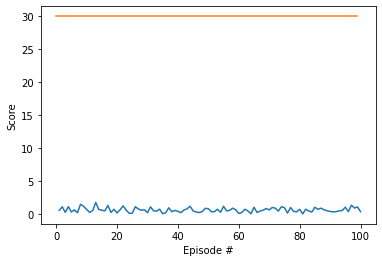

In [39]:
#Plot with average score for each episode  >30 
start = datetime.datetime.now()
print (start)
scores = Ddpg(n_episodes=10000)
endtime = datetime.datetime.now() -start
print (endtime)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(len(scores)), 30*np.ones(len(scores)))# print avg score 30
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [40]:
scores_bkup=scores

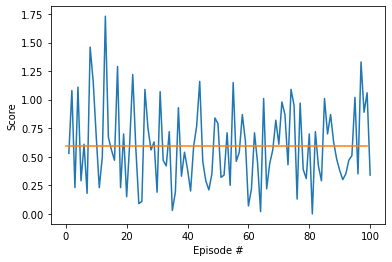

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(len(scores)), np.mean(scores)*np.ones(len(scores)))# print avg score 30
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

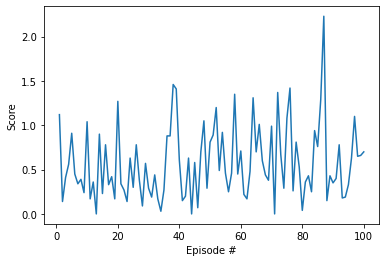

In [35]:
#Plot with average score >30 but plot each Episode avg score
#start = datetime.datetime.now()
#print (start)
#scores = Ddpg(n_episodes=5000)
#endtime = datetime.datetime.now() -start
#print (endtime)""
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
#plt.plot(np.arange(len(scores)), 30*np.ones(len(scores)))# print avg score 30
plt.ylabel('Avg Window Score')
plt.xlabel('Episode #')
plt.show()